In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [6]:
male = data.loc[data.sex == 'male']
female = data.loc[data.sex == 'female']

In [7]:
m_bmi = male.bmi
f_bmi = female.bmi

C:\Users\utk78\AppData\Local\Temp\ipykernel_3064\3843627692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_bmi, color= 'green', hist = False)
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\utk78\AppData\Local\Temp\ipykernel_3064\3843627692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
si

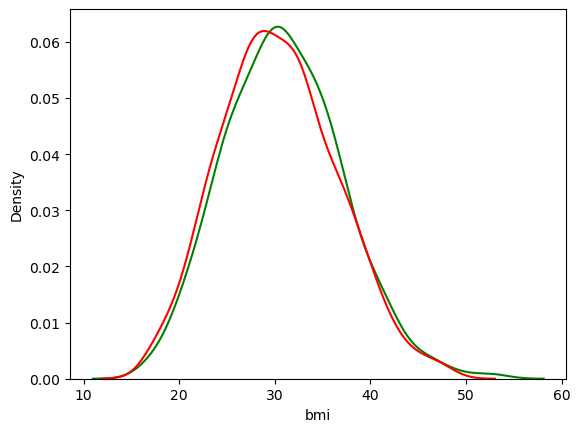

In [11]:
sns.distplot(m_bmi, color= 'green', hist = False)
sns.distplot(f_bmi, color= 'red', hist = False);

In [12]:
print(f_bmi.mean())
print(m_bmi.mean())

30.37774924471299
30.943128698224854


In [13]:
alpha = 0.05
t_value1, p_value1 = stats.ttest_ind(m_bmi, f_bmi)
print("t_value = ", t_value1, ", p_value = ", p_value1)

t_value =  1.696752635752224 , p_value =  0.08997637178984932


In [18]:
if p_value1 < alpha :
    print("Since, the p-value {} is lesser than alpha {}".format(p_value1, alpha))
    print("Reject the null hypothesis that there is no difference between bmi of males and bmi of females.")

else:
    print("Since, the p-value {} is greater than alpha {}".format(p_value1, alpha))
    print("Fail to reject the null hypothesis that there is no difference between bmi of males and bmi of females")

Since, the p-value 0.08997637178984932 is greater than alpha 0.05
Fail to reject the null hypothesis that there is no difference between bmi of males and bmi of females


### Hypothesis 2
Prove (or disprove) the hypothesis that medical claims made by people who smoke are greater than those who don't. 

In [19]:
smoker = data.loc[data.smoker == 'yes']
smoker_char = smoker.charges
sch_mean = smoker_char.mean()
sch_mean

32050.23183153284

In [20]:
non_smoker = data.loc[data.smoker == 'no']
non_smoker_char = non_smoker.charges
nsch_mean = non_smoker_char.mean()
nsch_mean

8434.268297856204

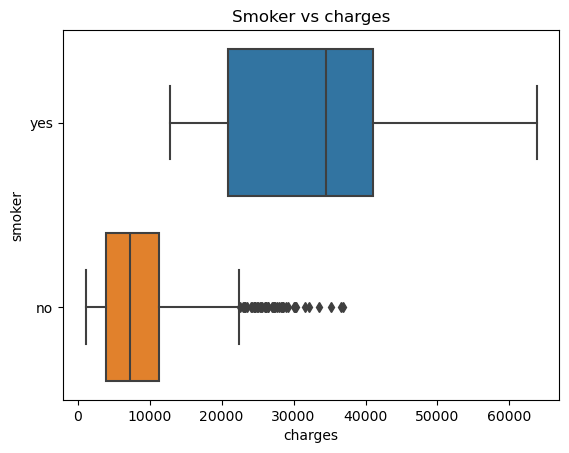

In [21]:
sns.boxplot(x= data.charges, y= data.smoker, data= data).set(title= 'Smoker vs charges');

In [26]:
alpha = 0.05
t_val2, p_val2 = stats.ttest_ind(smoker_char, non_smoker_char)
p_val_onetail = p_val2/2
print("t-value = {}, p-value = {}, p_value_onetail = {}".format(t_val2, p_val2, p_val_onetail))

t-value = 46.66492117272371, p-value = 8.271435842179102e-283, p_value_onetail = 4.135717921089551e-283


In [27]:
if p_val2 < alpha :
  print("Conclusion:Since p_value {} is less than alpha {} ".format (p_val_onetail,alpha) )
  print("Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.")

else:
  print("Conclusion:Since p value {} is greater than alpha {} ".format (p_val_onetail,alpha))
  print("Failed to reject null hypothesis that average charges for smokers are less than nonsmoker.")


Conclusion:Since p_value 4.135717921089551e-283 is less than alpha 0.05 
Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.


### Hypothesis 3
To prove (or disprove) that the mean bmi of women with no children, one child and two children are the same.

In [28]:
female_w_children = female.loc[female['children'] <= 2]


In [29]:
female_w_children.groupby([female_w_children.children]).mean(numeric_only = True).bmi

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

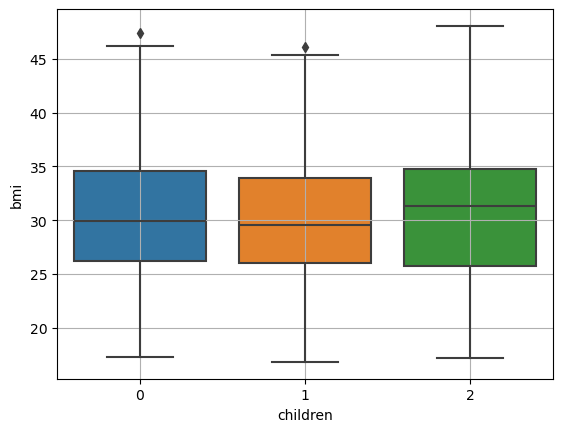

In [31]:
sns.boxplot(x = 'children', y = 'bmi', data = female_w_children)
plt.grid()
plt.show()

In [32]:
formula = 'bmi ~ C(children)'
model = ols(formula, female_w_children).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


### Hypothesis 4
To prove (or disprove) that proportion of smokers are not significantly different across different regions

In [33]:
contingency = pd.crosstab(data.region, data.smoker)
contingency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

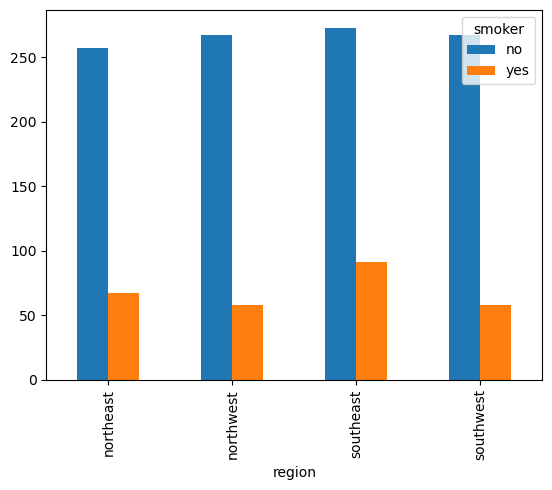

In [34]:
contingency.plot(kind = 'bar')

In [35]:
chi2, p_val3, dof, exp_freq = chi2_contingency(contingency, correction= False)
print('chi-squared statistic : {}, p-value : {}, degree of freedom : {}, expected frequency : {}'.format(chi2, p_val3, dof, exp_freq))

chi-squared statistic : 7.343477761407071, p-value : 0.06171954839170541, degree of freedom : 3, expected frequency : [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]]


Since, the p-value is less than 0.05, the hypothesis is rejected.
Therefore, the proportions of smokers are significantly different across different regions.